# Sub-graphs

In [23]:
from langgraph.graph import StateGraph, START, END
from langchain.chat_models import init_chat_model

In [24]:
model_id="gemini-2.5-flash-preview-05-20"
llm = init_chat_model(model=model_id,  model_provider="google_vertexai")

In [25]:
def add(a:int, b:int) -> int:
    """Adds a and b

    Args:
        a (int): a
        b (int): b

    Returns:
        int: a + b
    """
    return a + b

def sub(a:int, b:int) -> int:
    """subtracts a and b

    Args:
        a (int): a
        b (int): b

    Returns:
        int: a - b
    """
    return a - b

In [26]:
from langgraph.prebuilt import create_react_agent
arthimetic_agent = create_react_agent(
    llm,
    tools= [add, sub]
)


In [27]:
from langgraph.graph import MessagesState
def ask_llm(state: MessagesState) -> MessagesState:
    state['messages'] = llm.invoke(state['messages'])
    return state

In [28]:
def print_llm(state: MessagesState) -> MessagesState:
    state['messages'] = llm.invoke(state['messages'])
    return state

In [29]:
def call_react_agent(state: MessagesState) -> MessagesState:
    state['messages'] = arthimetic_agent.invoke({
        "messages": state['messages']
    })
    return state

In [30]:
other_builder = StateGraph(MessagesState)
other_builder.add_node('test', print_llm)
other_builder.add_edge(START, 'test')
other_builder.add_edge('test', END)
other_graph = other_builder.compile()

def call_other_graph(state: MessagesState) -> MessagesState:
    state['messages'] = other_graph.invoke({"messages": state['messages']})
    return state
    

In [36]:

builder = StateGraph(MessagesState)
builder.add_node("llm", ask_llm)
builder.add_node("react", arthimetic_agent)
builder.add_edge(START, "llm",)
builder.add_edge(START, "react")
builder.add_edge("llm", END)
builder.add_edge("react", END)
graph = builder.compile()


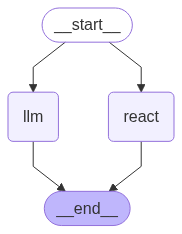

In [37]:
from utils import draw_graph
draw_graph(graph)